In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Trend following strategy

In [4]:
symbol = '^GSPC'
df = yf.download(symbol, start="2024-01-01", end="2025-01-01",auto_adjust=False)
df.index = pd.to_datetime(df.index)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2024-01-02,4742.830078,4742.830078,4754.330078,4722.669922,4745.200195,3743050000
2024-01-03,4704.810059,4704.810059,4729.290039,4699.709961,4725.069824,3950760000
2024-01-04,4688.680176,4688.680176,4726.779785,4687.529785,4697.419922,3715480000
2024-01-05,4697.240234,4697.240234,4721.490234,4682.109863,4690.569824,3844370000
2024-01-08,4763.540039,4763.540039,4764.540039,4699.819824,4703.700195,3742320000


<Figure size 1500x700 with 0 Axes>

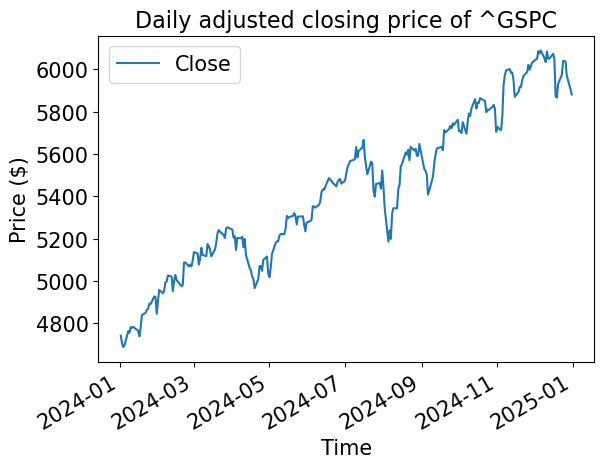

In [6]:
# plot the adj closing price
plt.figure(figsize=(15, 7))
df['Adj Close'].plot()

# set labels and sizes of the title and axis
plt.title('Daily adjusted closing price of ^GSPC', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# show the plot
plt.show()

# Simple moving average (SMA)

In [8]:
window = 5
SMA1 = "SMA-"+str(window)
df[SMA1] = df['Adj Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1]
df2 = df[colnames]
df2.head()

Price,Adj Close,SMA-5
Ticker,^GSPC,
Date,,
2024-01-02,4742.830078,NaN
2024-01-03,4704.810059,NaN
2024-01-04,4688.680176,NaN
2024-01-05,4697.240234,NaN
2024-01-08,4763.540039,4719.420117


In [10]:
df['New_SMA'] = df['Adj Close'].rolling(window, min_periods=1).mean()
df[colnames + ['New_SMA']].head()

Price,Adj Close,SMA-5,New_SMA
Ticker,^GSPC,,
Date,,,
2024-01-02,4742.830078,NaN,4742.830078
2024-01-03,4704.810059,NaN,4723.820068
2024-01-04,4688.680176,NaN,4712.106771
2024-01-05,4697.240234,NaN,4708.390137
2024-01-08,4763.540039,4719.420117,4719.420117


Text(0, 0.5, 'Price')

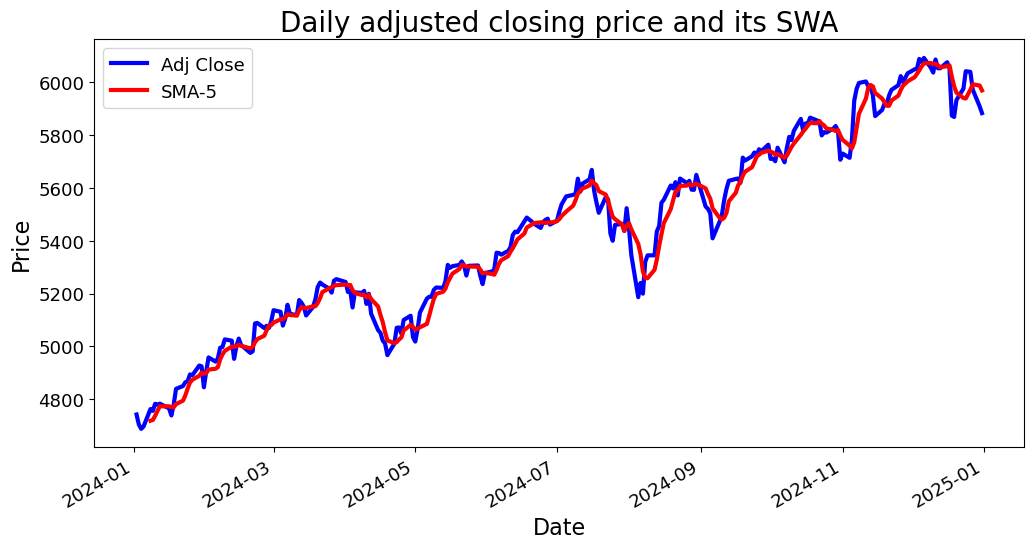

In [12]:
# colors for the line plot
colors = ['blue', 'red']

# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)

# title and labels
plt.title('Daily adjusted closing price and its SWA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [14]:
window = 20
SMA2 = "SMA-"+str(window)
df2[SMA2] = df2['Adj Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1,SMA2]

/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/1873323566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[SMA2] = df2['Adj Close'].rolling(window).mean()


Text(0, 0.5, 'Price')

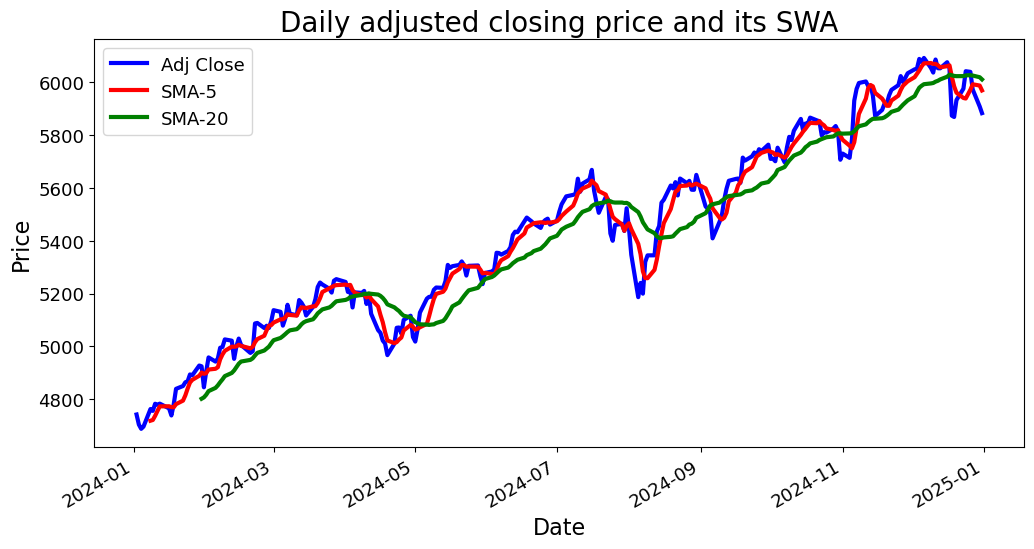

In [16]:
# colors for the line plot
colors = ['blue', 'red', 'green']

# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)

# title and labels
plt.title('Daily adjusted closing price and its SWA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [18]:
# Shift to the future by one day so that everyday uses the information up to
# yesterday to make a trading decision for tmr
df2['SMA-5'] = df2['SMA-5'].shift(1)
df2['SMA-20'] = df2['SMA-20'].shift(1)

/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/2179833345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-5'] = df2['SMA-5'].shift(1)
/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/2179833345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-20'] = df2['SMA-20'].shift(1)


In [20]:
# identify buy signal
df2['signal'] = np.where(df2['SMA-5'] > df2['SMA-20'], 1, 0)
# identify sell signal
df2['signal'] = np.where(df2['SMA-5'] < df2['SMA-20'], -1, df2['signal'])
df2.dropna(inplace=True)
df2.head()

/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/872723592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-5'] > df2['SMA-20'], 1, 0)
/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/872723592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-5'] < df2['SMA-20'], -1, df2['signal'])
/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/872723592.py:5: SettingWithCopyWarning: 
A value is trying

Price,Adj Close,SMA-5,SMA-20,signal
Ticker,^GSPC,,,
Date,,,,
2024-01-31,4845.649902,4901.316113,4802.433594,1
2024-02-01,4906.189941,4896.736133,4807.574585,1
2024-02-02,4958.609863,4899.142090,4817.643579,1
2024-02-05,4942.810059,4912.670020,4831.140063,1
2024-02-06,4954.229980,4915.645996,4843.418555,1


In [22]:
# frequency counts
df2['signal'].value_counts()

signal
 1    177
-1     55
Name: count, dtype: int64

In [24]:
# calculate instantaneous log return for buy-and-hold straetegy as benchmark
df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff()
df2.head()

/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/3444238552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff()


Price,Adj Close,SMA-5,SMA-20,signal,log_return_buy_n_hold
Ticker,^GSPC,,,,
Date,,,,,
2024-01-31,4845.649902,4901.316113,4802.433594,1,NaN
2024-02-01,4906.189941,4896.736133,4807.574585,1,0.012416
2024-02-02,4958.609863,4899.142090,4817.643579,1,0.010628
2024-02-05,4942.810059,4912.670020,4831.140063,1,-0.003191
2024-02-06,4954.229980,4915.645996,4843.418555,1,0.002308


In [26]:
# calculate instantaneous log return for trend following straetegy
df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']
df2.head()

/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/2640271956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']


Price,Adj Close,SMA-5,SMA-20,signal,log_return_buy_n_hold,log_return_trend_follow
Ticker,^GSPC,,,,,
Date,,,,,,
2024-01-31,4845.649902,4901.316113,4802.433594,1,NaN,NaN
2024-02-01,4906.189941,4896.736133,4807.574585,1,0.012416,0.012416
2024-02-02,4958.609863,4899.142090,4817.643579,1,0.010628,0.010628
2024-02-05,4942.810059,4912.670020,4831.140063,1,-0.003191,-0.003191
2024-02-06,4954.229980,4915.645996,4843.418555,1,0.002308,0.002308


In [28]:
# derive trading action at each time step; 2 is buy, -2 is sell
df2['action'] = df2.signal.diff()
df2['action'].value_counts()

/var/folders/l1/bjr1glpn4tl_45ht4t2ljz6r0000gn/T/ipykernel_39064/327147424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['action'] = df2.signal.diff()


action
 0.0    222
-2.0      5
 2.0      4
Name: count, dtype: int64

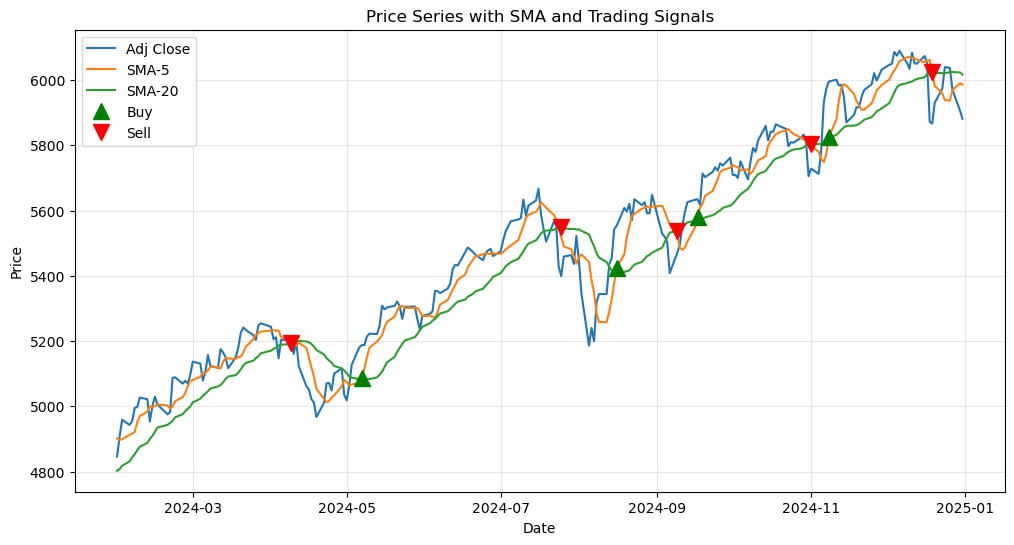

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 6
plt.plot(df2['Adj Close'], label='Adj Close')
plt.plot(df2['SMA-5'], label='SMA-5')
plt.plot(df2['SMA-20'], label='SMA-20')
plt.plot(df2[df2.action == 2].index,
         df2['SMA-5'][df2.action == 2],
         '^', color='g', markersize=12, label='Buy')
plt.plot(df2[df2.action == -2].index,
         df2['SMA-20'][df2.action == -2],
         'v', color='r', markersize=12, label='Sell')

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.title('Price Series with SMA and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')

# save before showing
plt.savefig('trading_plot.png', dpi=300, bbox_inches='tight')
plt.show()


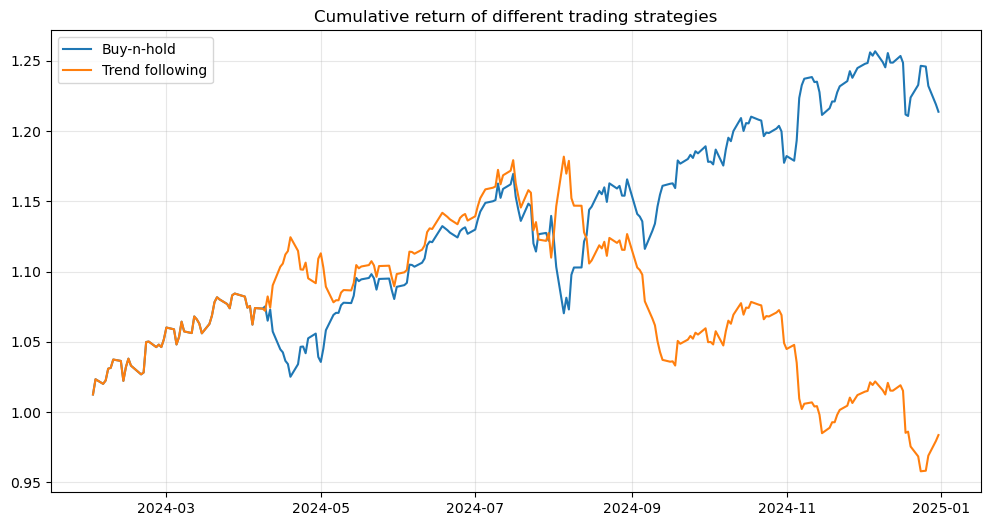

In [32]:
# plot cumulative return
plt.plot(np.exp(df2['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')
plt.plot(np.exp(df2['log_return_trend_follow']).cumprod(), label='Trend following')
plt.legend(loc=2)
plt.title("Cumulative return of different trading strategies")
plt.grid(True, alpha=.3)